In [1]:
import pandas as pd
import numpy as np 


customers_df = pd.read_csv('customers_dataset.csv', sep = ',')
orders_items_df = pd.read_csv('order_items_dataset.csv', sep = ',')
geolocation_df = pd.read_csv('olist_geolocation_dataset.csv', sep = ",")
payments_df = pd.read_csv('order_payments_dataset.csv', sep = ',')
order_review_df = pd.read_csv('order_review_dataset_clean.csv', sep = ',')
orders_df = pd.read_csv('orders_dataset.csv', sep = ',')
product_category_translation_df = pd.read_csv('product_category_name_translation.csv', sep = ',')
products_df = pd.read_csv('products_dataset.csv', sep = ',')
sellers_df = pd.read_csv('olist_sellers_dataset.csv', sep = ',')
state_df = pd.read_csv('state_name.csv', sep = ',')

print(state_df.describe())



       state state_name
count     27         27
unique    27         27
top       AC       Acre
freq       1          1


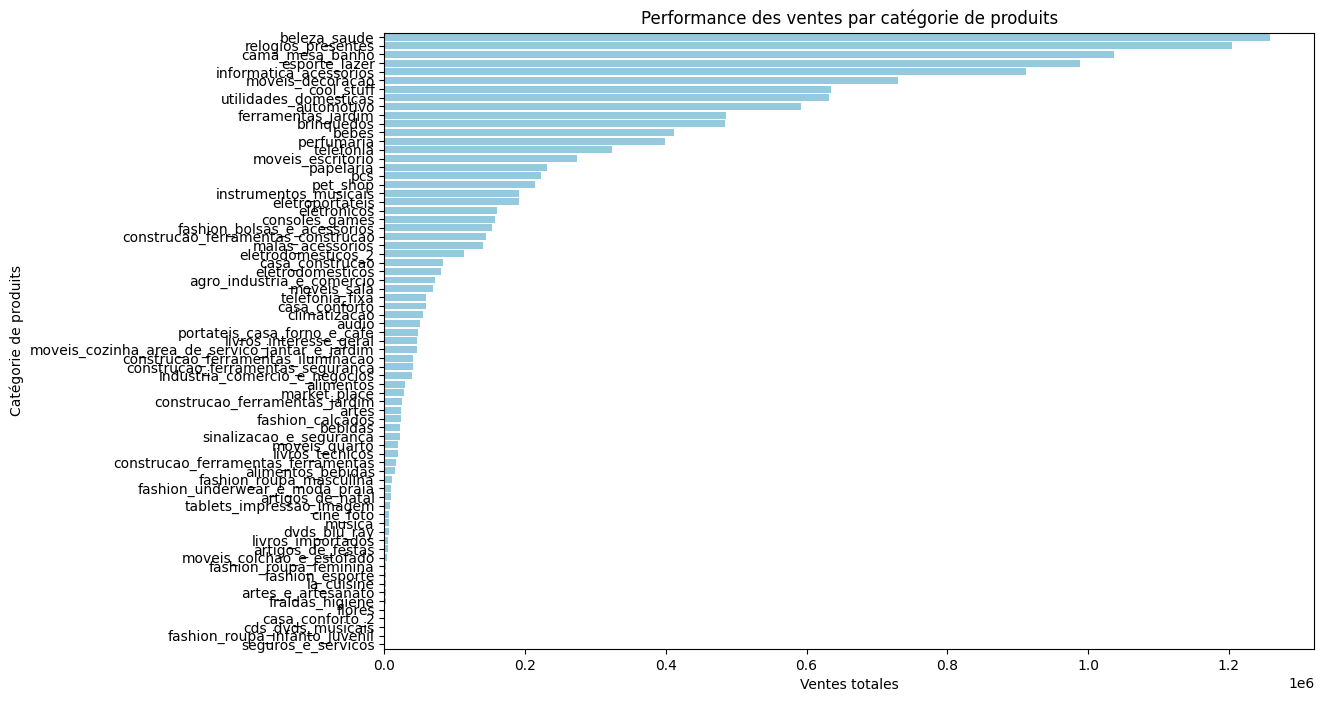

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


merged_df = pd.merge(orders_items_df, products_df, on='product_id')
merged_df = pd.merge(merged_df, product_category_translation_df, on='product_category_name')

#  somme ventes par cat products
sales_by_category = merged_df.groupby('product_category_name').agg({'price': 'sum'}).reset_index()

# Tri cat par ordre décroissant
sales_by_category = sales_by_category.sort_values(by='price', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='price', y='product_category_name', data=sales_by_category, color='skyblue', dodge=True)
plt.title('Performance des ventes par catégorie de produits')
plt.xlabel('Ventes totales')
plt.ylabel('Catégorie de produits')
plt.show()



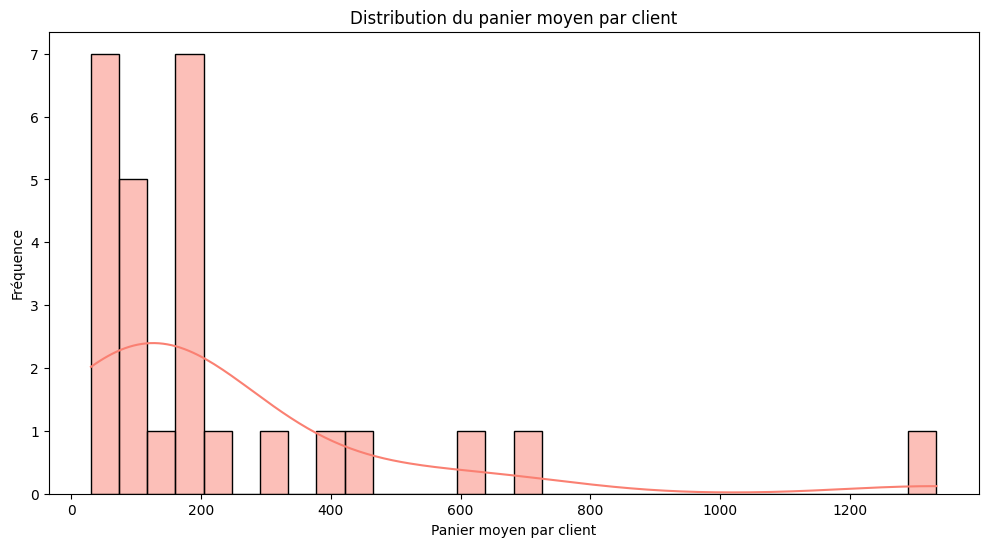

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


merged_df = pd.merge(orders_df, order_review_df, on='order_id')
merged_df = pd.merge(merged_df, payments_df, on='order_id')

# Calcule montant total cx
total_spent_per_customer = merged_df.groupby('customer_id')['payment_value'].sum().reset_index()

# Calcul panier moyen par cx
average_basket_per_customer = merged_df.groupby('customer_id')['payment_value'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.histplot(average_basket_per_customer['payment_value'], bins=30, kde=True, color='salmon')
plt.title('Distribution du panier moyen par client')
plt.xlabel('Panier moyen par client')
plt.ylabel('Fréquence')
plt.show()


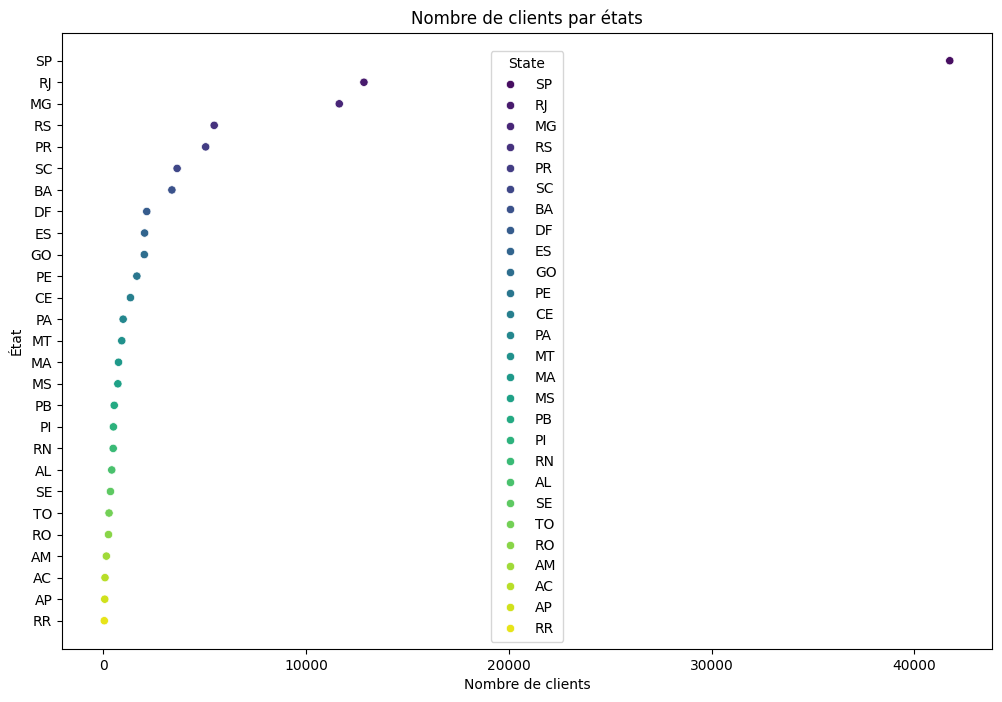

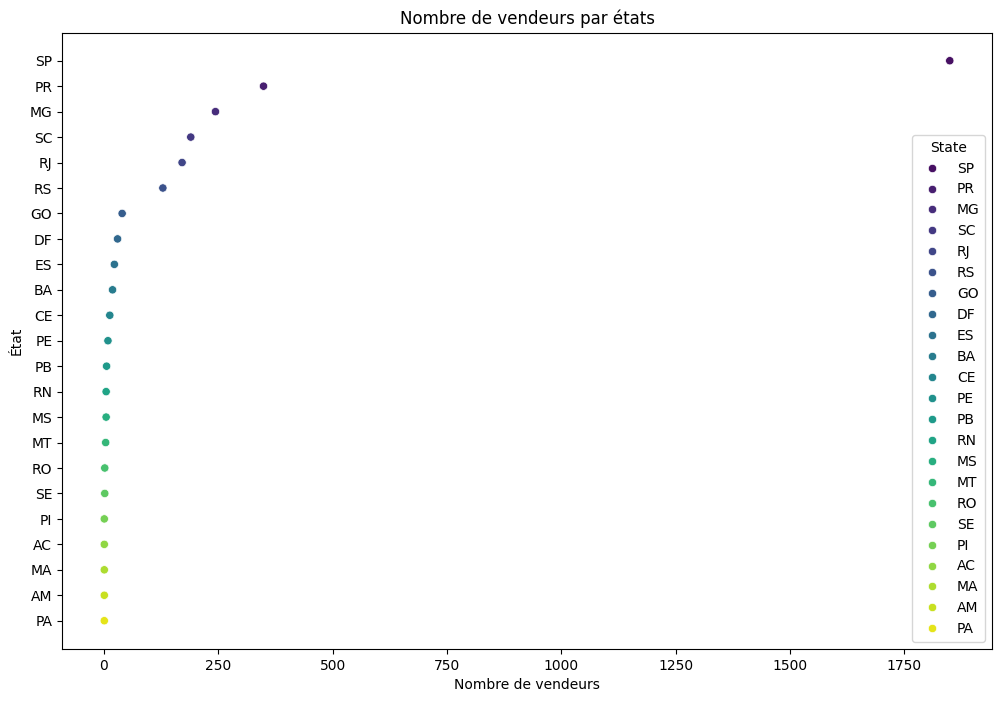

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compte nb cx par état
customer_count_by_state = customers_df['customer_state'].value_counts().reset_index()
customer_count_by_state.columns = ['State', 'Customer Count']


plt.figure(figsize=(12, 8))
sns.scatterplot(x='Customer Count', y='State', hue='State', data=customer_count_by_state, palette='viridis')
plt.title('Nombre de clients par états')
plt.xlabel('Nombre de clients')
plt.ylabel('État')
plt.show()

sellers_count_by_state = sellers_df['seller_state'].value_counts().reset_index()
sellers_count_by_state.columns = ['State', 'Seller Count']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Seller Count', y='State', hue='State', data=sellers_count_by_state, palette='viridis')
plt.title('Nombre de vendeurs par états')
plt.xlabel('Nombre de vendeurs')
plt.ylabel('État')
plt.show()




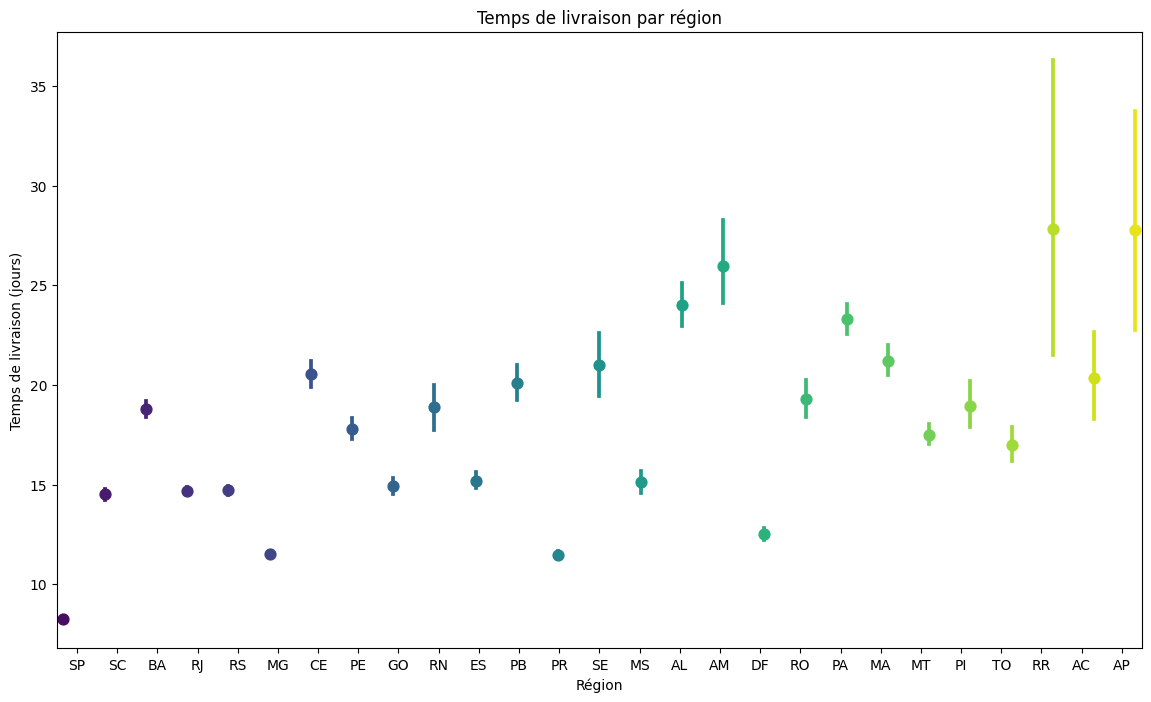

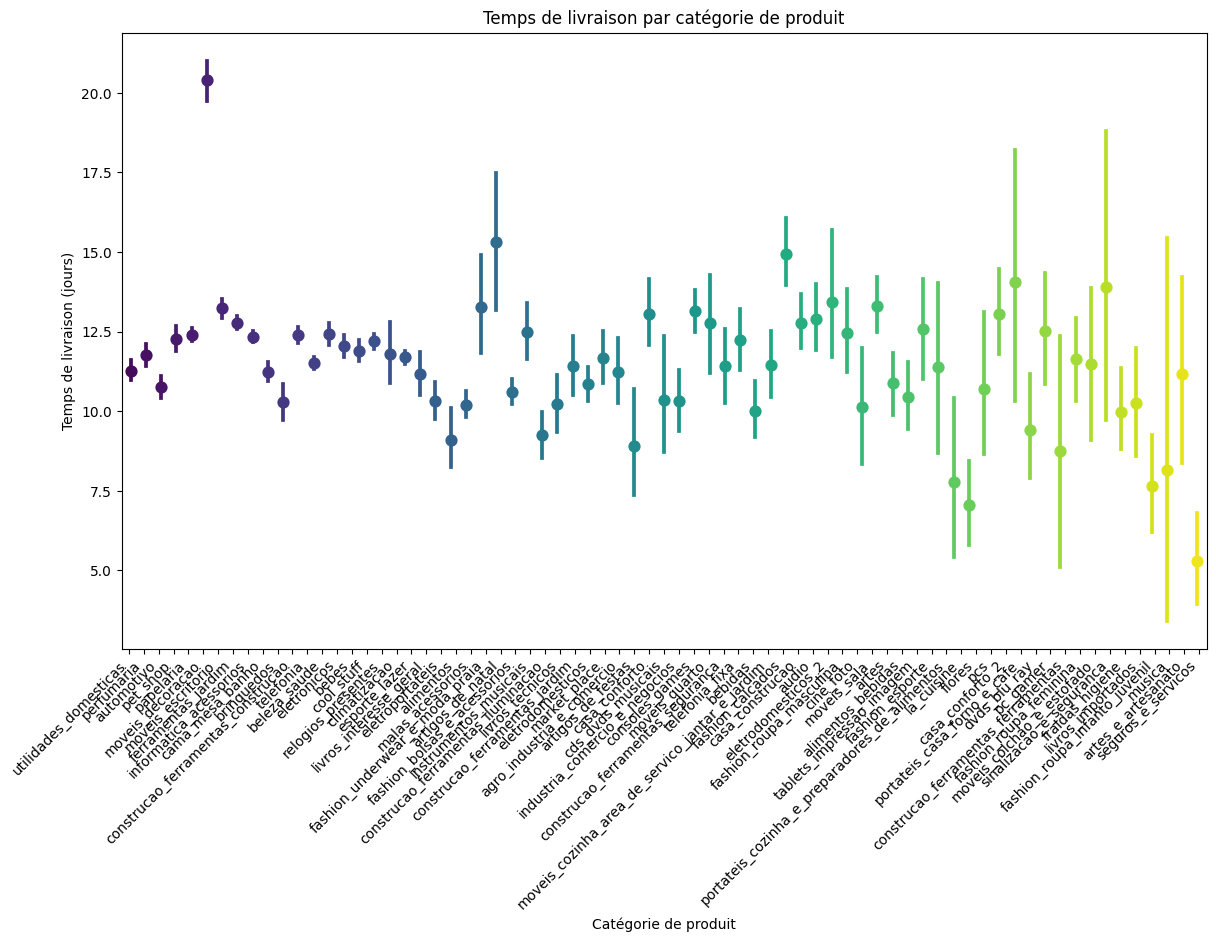

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


merged_df = pd.merge(orders_df, customers_df, on='customer_id')
merged_df = pd.merge(merged_df, orders_items_df, on='order_id')
merged_df = pd.merge(merged_df, products_df, on='product_id')

# Calcul temps de livraison en jours
merged_df['delivery_time_days'] = (pd.to_datetime(merged_df['order_delivered_customer_date']) - 
                                   pd.to_datetime(merged_df['order_purchase_timestamp'])).dt.days

plt.figure(figsize=(14, 8))
sns.pointplot(x='customer_state', y='delivery_time_days', hue='customer_state', data=merged_df, palette='viridis', dodge=True, legend=False)
plt.title('Temps de livraison par région')
plt.xlabel('Région')
plt.ylabel('Temps de livraison (jours)')
plt.show()

# temps de livraison par catproduit
plt.figure(figsize=(14, 8))
sns.pointplot(x='product_category_name', y='delivery_time_days', hue='product_category_name', data=merged_df, palette='viridis', dodge=True, legend=False)
plt.title('Temps de livraison par catégorie de produit')
plt.xlabel('Catégorie de produit')
plt.ylabel('Temps de livraison (jours)')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe x
plt.show()






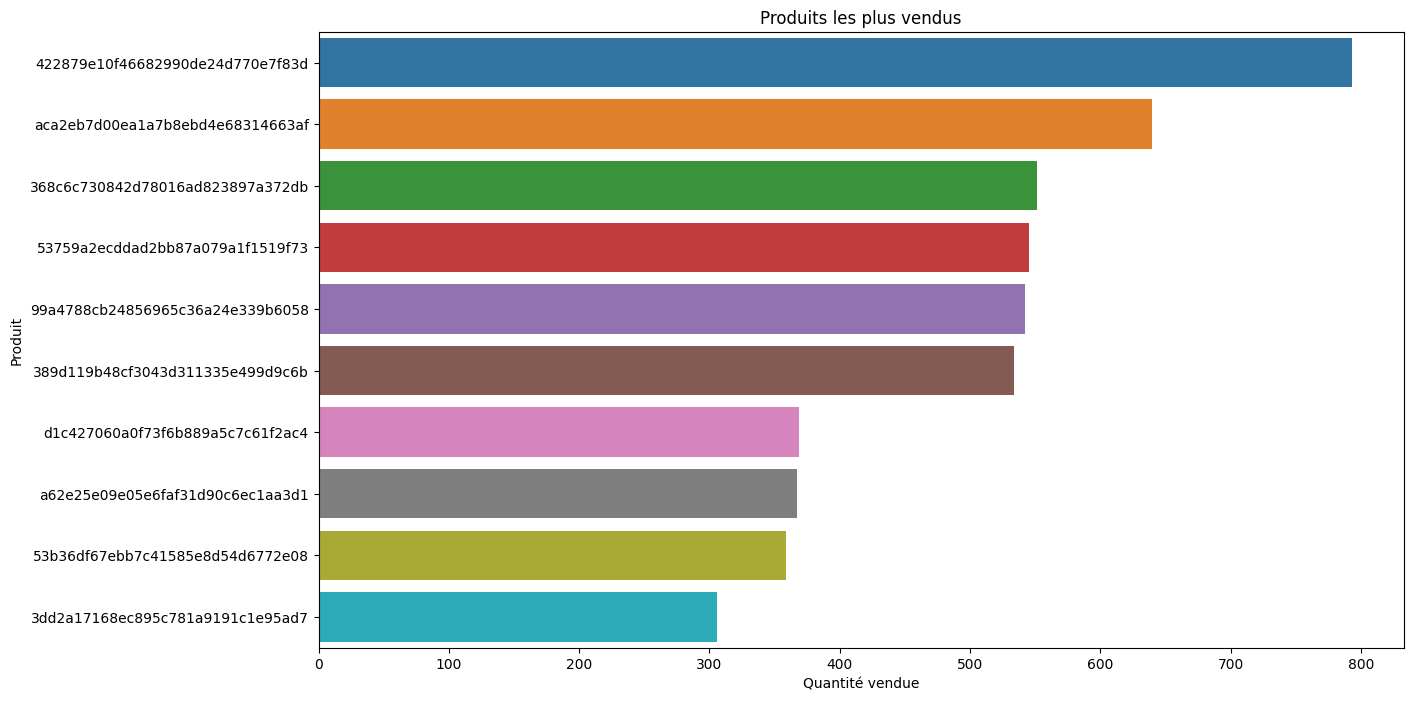

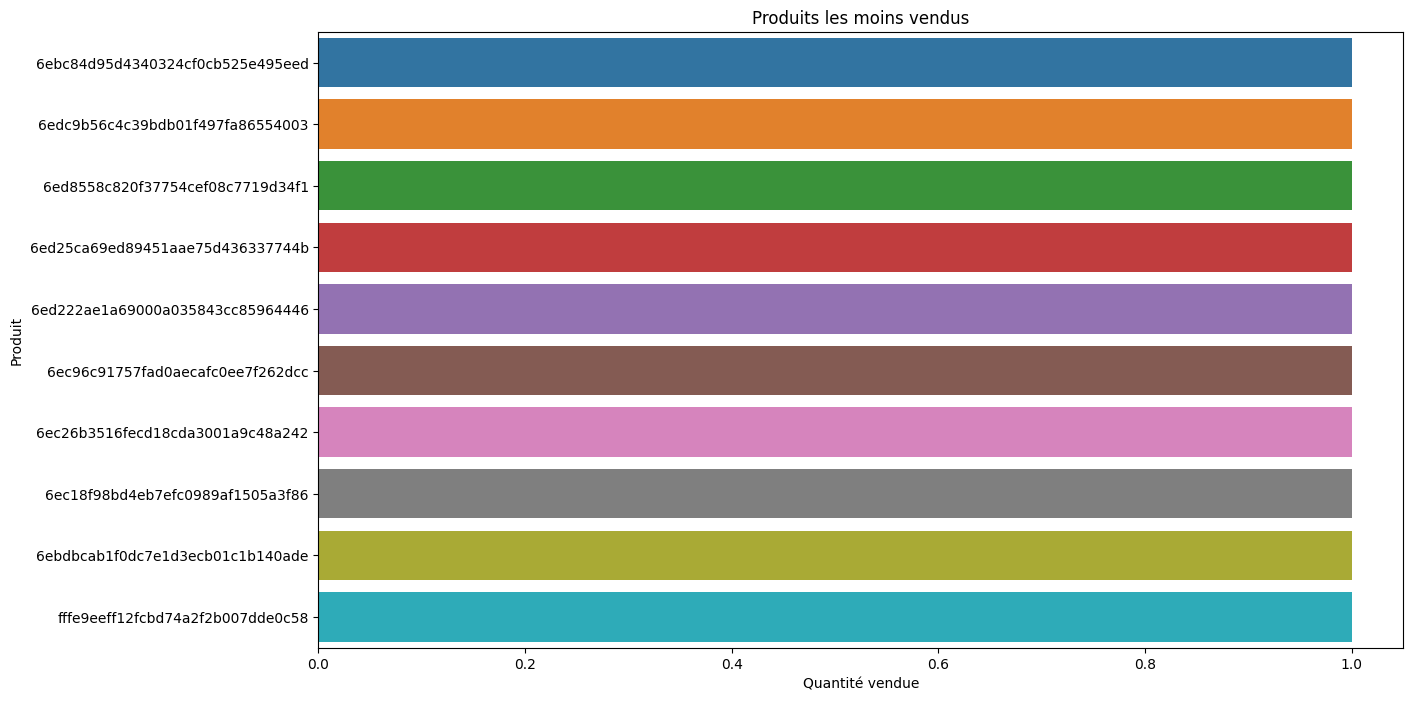

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


merged_df = pd.merge(orders_df, orders_items_df, on='order_id')
merged_df = pd.merge(merged_df, products_df, on='product_id')

# quantité vendue par produit
product_sales = merged_df.groupby('product_id')['order_item_id'].sum().reset_index()

# Trier les produits par quantité vendue
product_sales = product_sales.sort_values(by='order_item_id', ascending=False)

# 10 produits les plus vendus 10 produits les moins vendus
top_products = product_sales.head(10)
bottom_products = product_sales.tail(10)

# raphique de barres pour les produits les plus vendus
plt.figure(figsize=(14, 8))
sns.barplot(x='order_item_id', y='product_id', data=top_products,hue = 'product_id')
plt.title('Produits les plus vendus')
plt.xlabel('Quantité vendue')
plt.ylabel('Produit')
plt.show()

# graphique de barres pour les produits les moins vendus
plt.figure(figsize=(14, 8))
sns.barplot(x='order_item_id', y='product_id', data=bottom_products, hue = 'product_id')
plt.title('Produits les moins vendus')
plt.xlabel('Quantité vendue')
plt.ylabel('Produit')
plt.show()



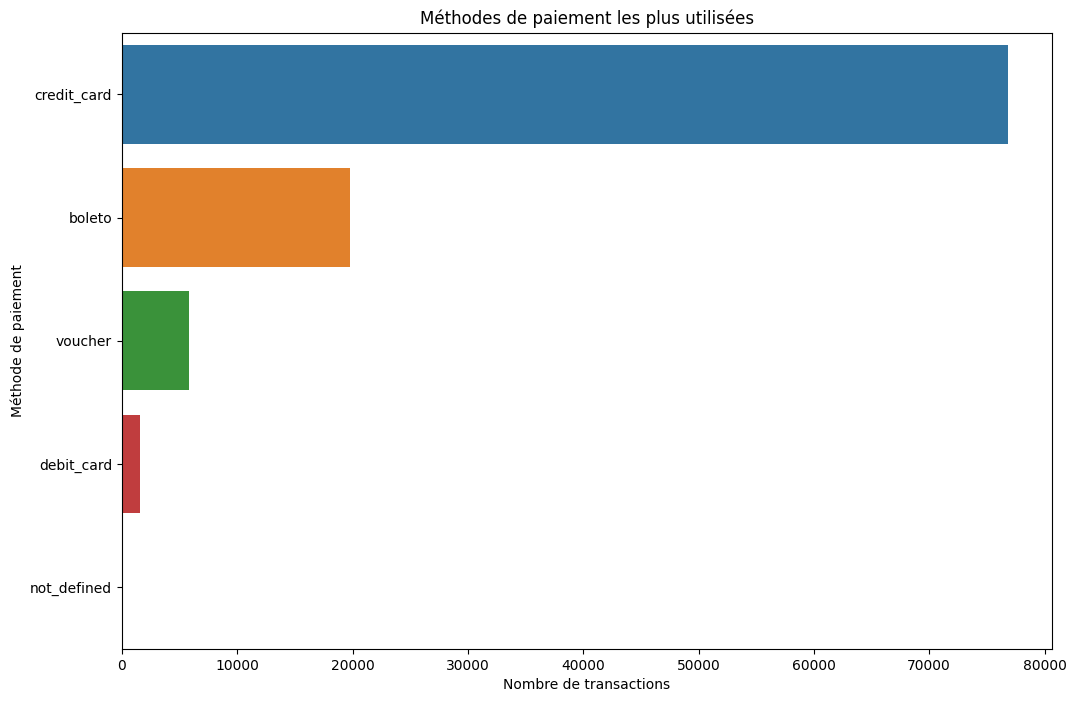

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


merged_df = pd.merge(orders_df, payments_df, on='order_id')

# nb transactions par méthode de paiement
payment_counts = merged_df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Transaction Count']


plt.figure(figsize=(12, 8))
sns.barplot(x='Transaction Count', y='Payment Method', data=payment_counts, hue = 'Payment Method')
plt.title('Méthodes de paiement les plus utilisées')
plt.xlabel('Nombre de transactions')
plt.ylabel('Méthode de paiement')
plt.show()


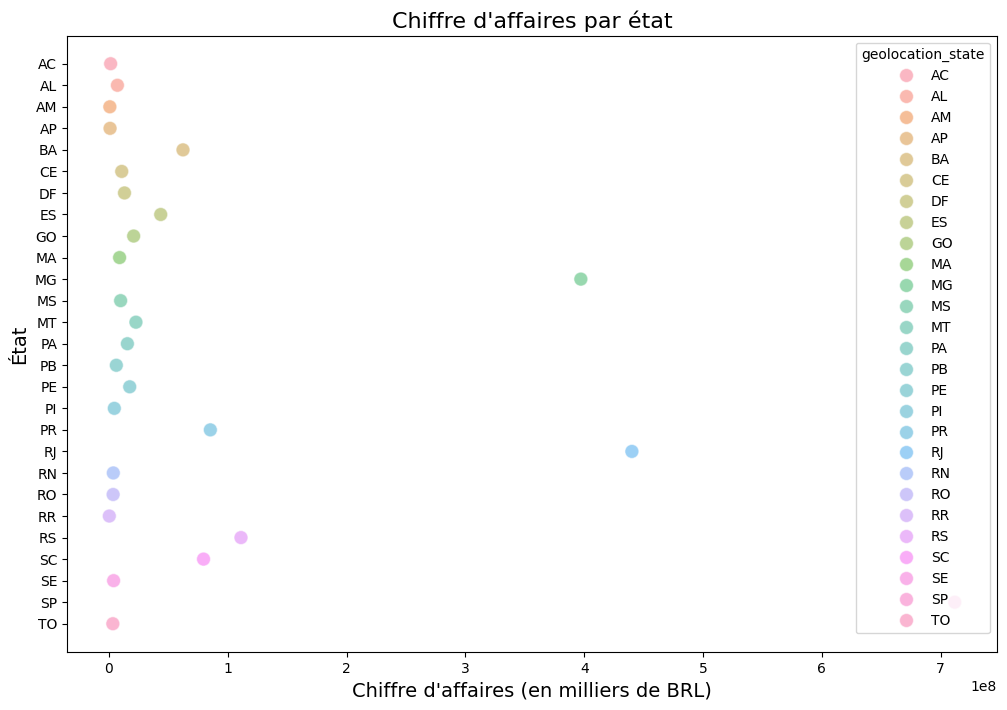

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


merged_df = pd.merge(orders_df, orders_items_df, on='order_id')
merged_df = pd.merge(merged_df, products_df, on='product_id')
merged_df = pd.merge(merged_df, customers_df, on='customer_id')  
merged_df = pd.merge(merged_df, geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

# CA par état
revenue_by_state = merged_df.groupby('geolocation_state')['price'].sum().reset_index()


plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='geolocation_state', data=revenue_by_state, hue = 'geolocation_state', alpha = 0.5, s = 100)


plt.title('Chiffre d\'affaires par état', fontsize=16)
plt.xlabel('Chiffre d\'affaires (en milliers de BRL)', fontsize=14)
plt.ylabel('État', fontsize=14)


plt.show()


